In this notebook I have performed Exploratory Data Analysis on the housing dataset and tried to identify relationship between a house's Sales Price and various other features. After EDA data pre-processing is done to handle different missing values after which I have applied different regression models to make the predictions. 

I hope you find this kernel helpful and some **<font color='red'>UPVOTES</font>** would be very much appreciated

In [1]:
import warnings
warnings.filterwarnings('ignore')

## **Importing Required Libraries**

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

## **Loading the Training and Testing Dataset**

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Describing the Training Dataset

In [4]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


#### **Dimensions of training dataset**

In [5]:
print('Number of rows in training set: ',train.shape[0])
print('Number of columns in training set: ', train.shape[1])

Number of rows in training set:  1460
Number of columns in training set:  81


### **Describing the test dataset**

In [6]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


#### **Dimensions of test dataset**

In [7]:
print('Number of rows in test dataset: ', test.shape[0])
print('Number of columns in test dataset: ', test.shape[1])

Number of rows in test dataset:  1459
Number of columns in test dataset:  80


**Concatinating both the training and testing set for exploratory data analysis**

Since the training set contains one extra column **'SalePrice'**, I will remove it during concatination

In [8]:
df = pd.concat([train.drop('SalePrice', axis = 1),test], axis = 0)

#### **Peeking into the dataset**

In [9]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


#### **Dimensions of combined dataset**

In [10]:
print('Number of rows in dataset: ', df.shape[0])
print('Number of columns in dataset: ', df.shape[1])

Number of rows in dataset:  2919
Number of columns in dataset:  80


#### **Describing the dataset**

Since the **'Id'** column is of no use in describing the dataset, I will remove it during describing

In [11]:
df.drop('Id', axis = 1).describe().T                   #T = transpose of the dataset

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


**Total Number of Categorical Attributes**

In [12]:
print('No. of categorical attributes: ', df.select_dtypes(exclude = ['int64','float64']).columns.size)

No. of categorical attributes:  43


**Total Number of Numerical Attributes**

In [13]:
print('No. of numerical attributes: ', df.select_dtypes(exclude = ['object']).columns.size)

No. of numerical attributes:  37


**Checking for Null Values in the dataset**

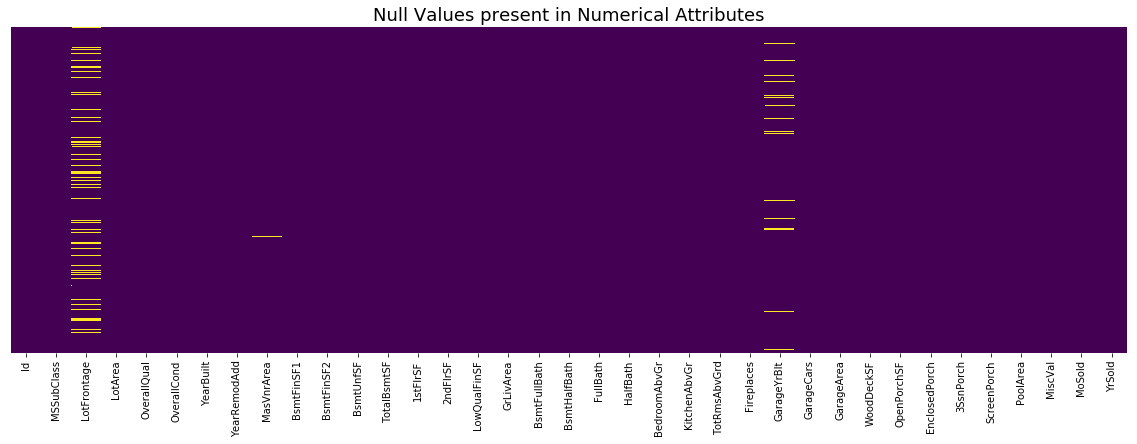

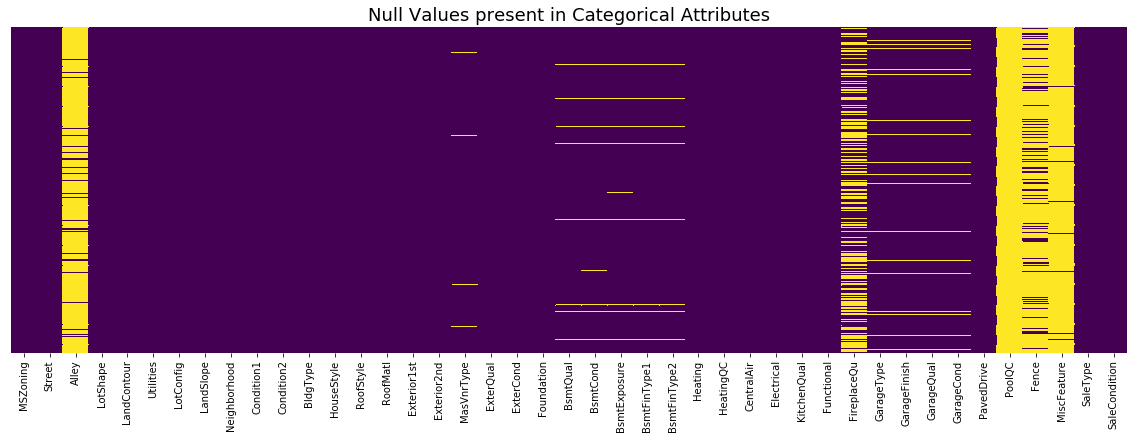

In [14]:
plt.figure(figsize=(20,6))
sns.heatmap(df.select_dtypes(exclude=['object']).isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.title('Null Values present in Numerical Attributes',fontsize=18)
plt.show()

plt.figure(figsize=(20,6))
sns.heatmap(df.select_dtypes(exclude=['int64','float64']).isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.title('Null Values present in Categorical Attributes',fontsize=18)
plt.show()

#### **Plotting the percentage(%) of null values **

Only those Null Values are included whose percentage(%) is greater than 0

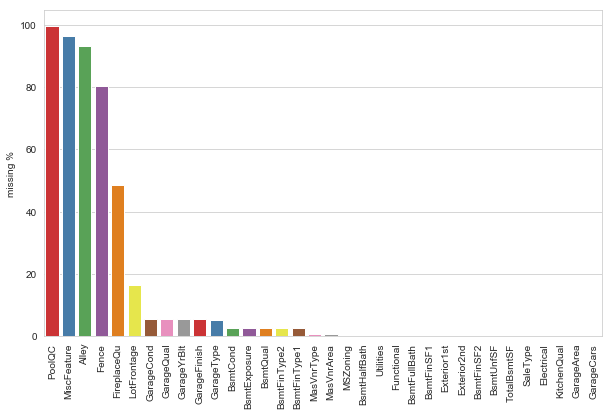

In [15]:
null_val = df.isnull().sum()/len(df)*100
null_val.sort_values(ascending = False, inplace = True)
null_val = pd.DataFrame(null_val, columns = ['missing %'])
null_val = null_val[null_val['missing %'] > 0]

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(x = null_val.index, y = null_val['missing %'], palette='Set1')
plt.xticks(rotation = 90)
plt.show()

## **Exploratory Data Analysis and Visualization**

### **1. Plotting the distribution of all Numerical Attributes**

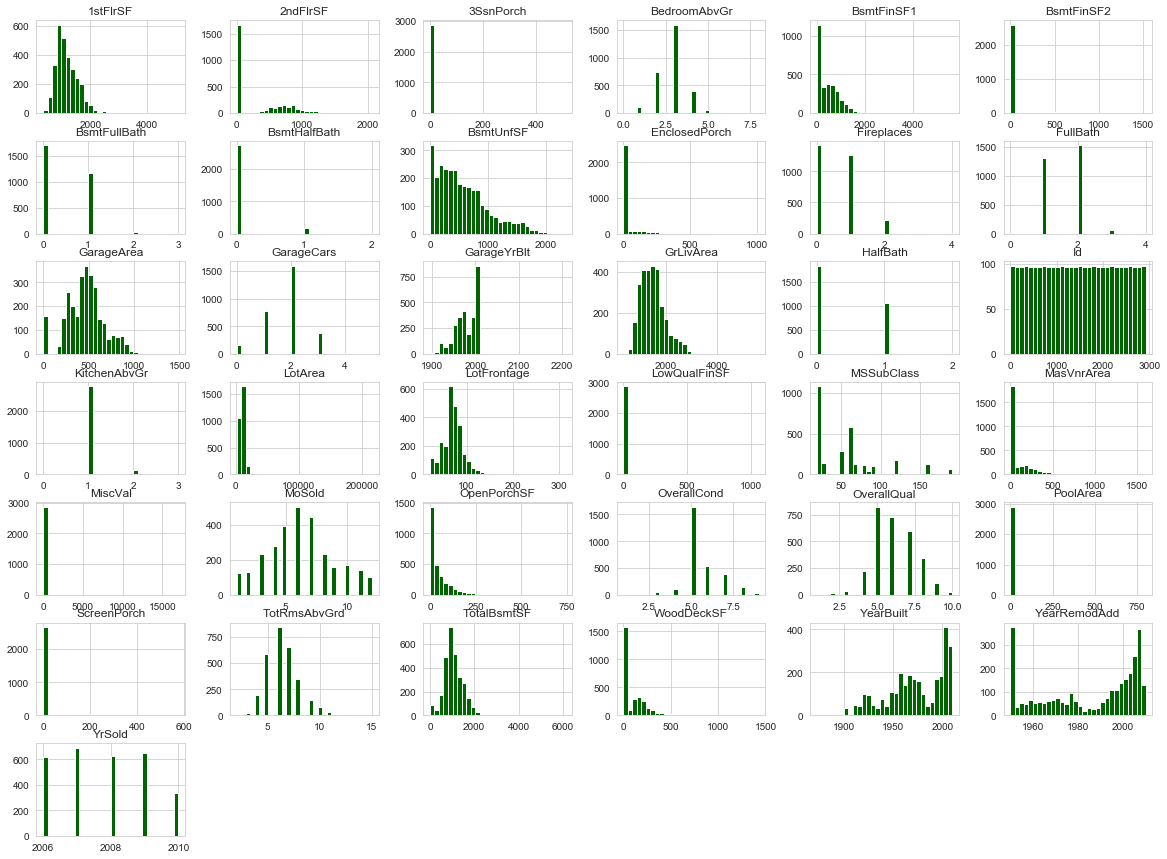

<Figure size 432x288 with 0 Axes>

In [16]:
sns.set_style('whitegrid')
df.hist(bins = 30, figsize = (20,15), color = 'darkgreen')
plt.show()
plt.tight_layout()

### **2. Heatmap of all the features**

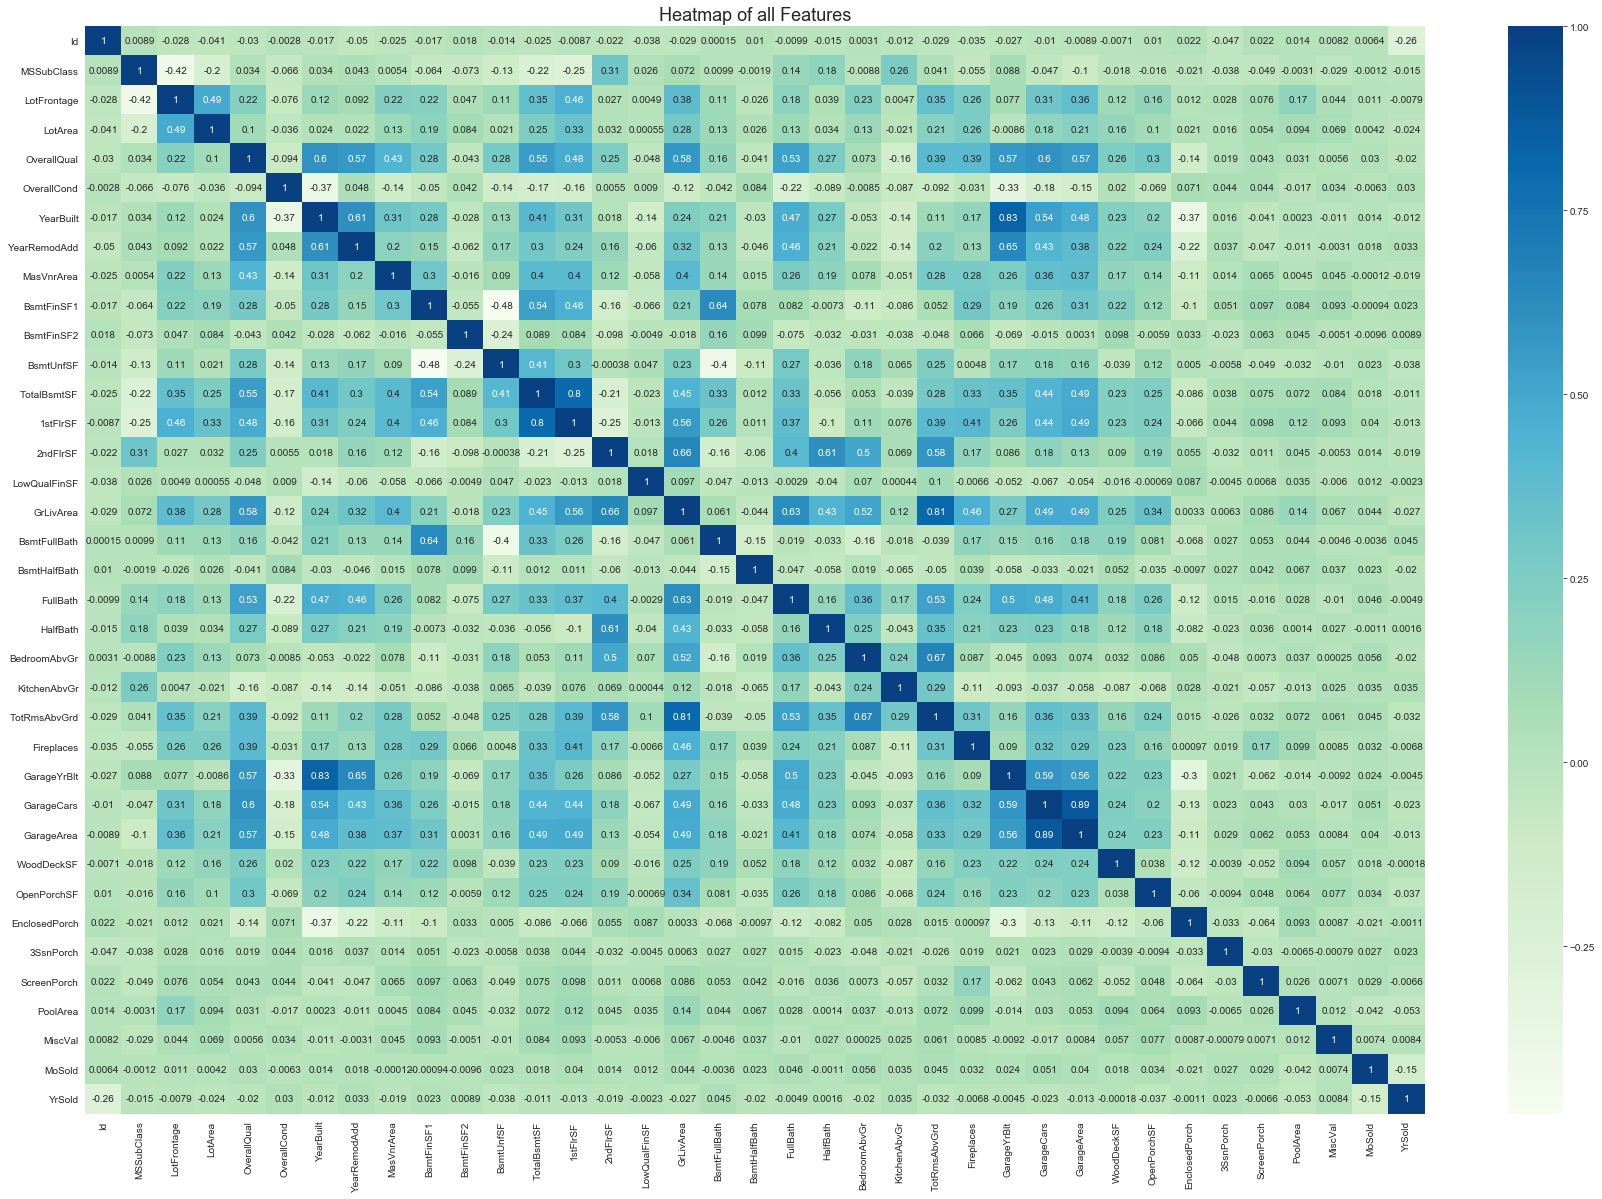

In [17]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot = True,cmap='GnBu')
plt.title('Heatmap of all Features',fontsize=18)
plt.show()

### **3. Pairplot between various features**

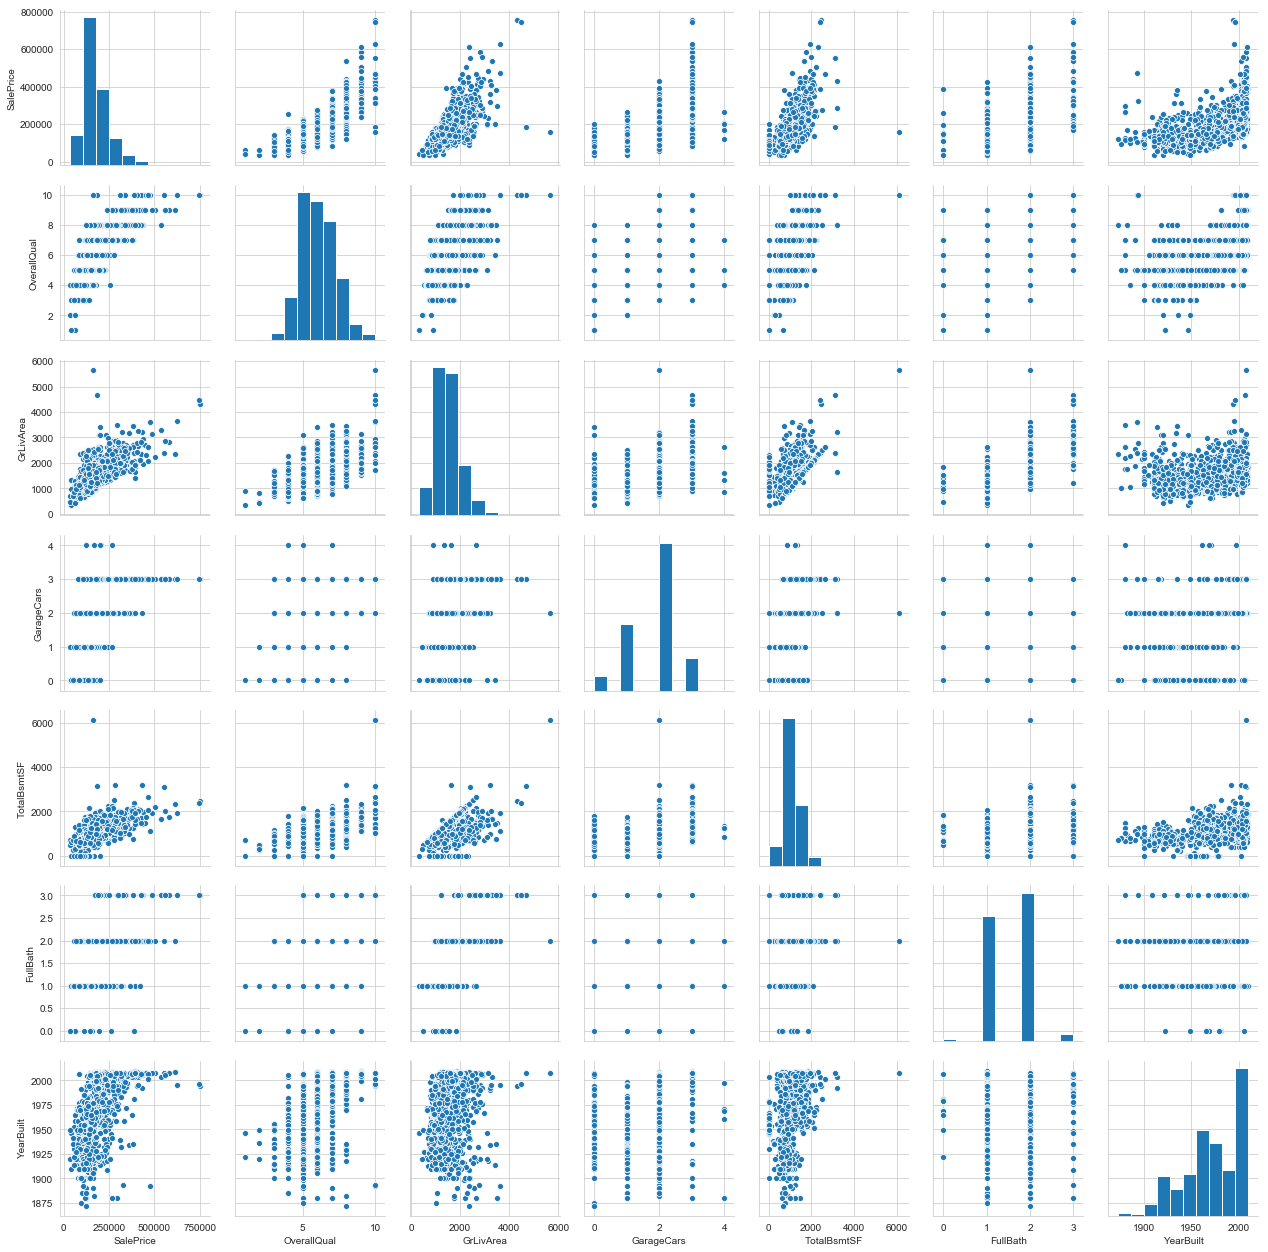

In [18]:
sns.set_style('whitegrid')
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols])
plt.show()

### **Plotting the relationships between 'SalePrice' with numerical features**

#### **1. SalePrice SalePrice vs 1stFlrSF**

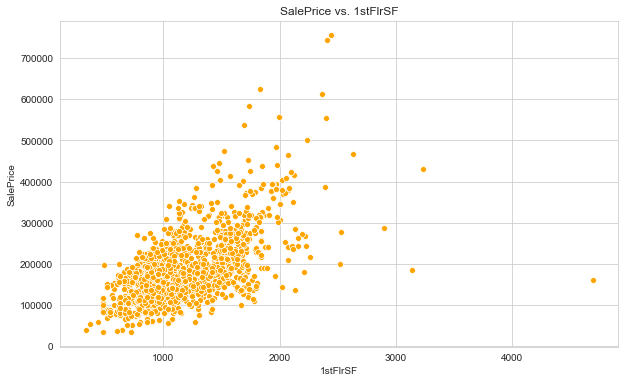

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='1stFlrSF',y='SalePrice', data = train,color = 'orange')
plt.title('SalePrice vs. 1stFlrSF')
plt.show()

#### **2. SalePrice vs. GrLivArea**

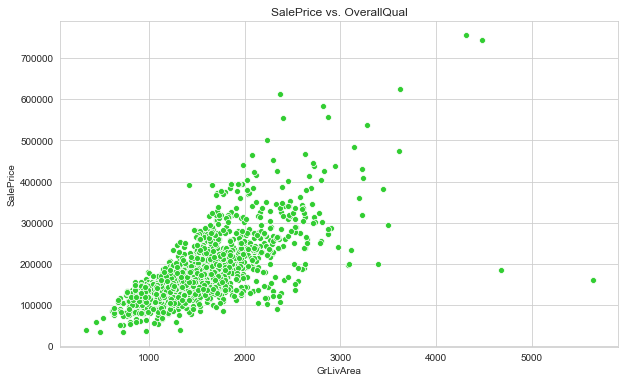

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GrLivArea',y='SalePrice', data = train,color = 'limegreen')
plt.title('SalePrice vs. OverallQual')
plt.show()

#### **3. SalePrice vs. TotalBsmtSF**

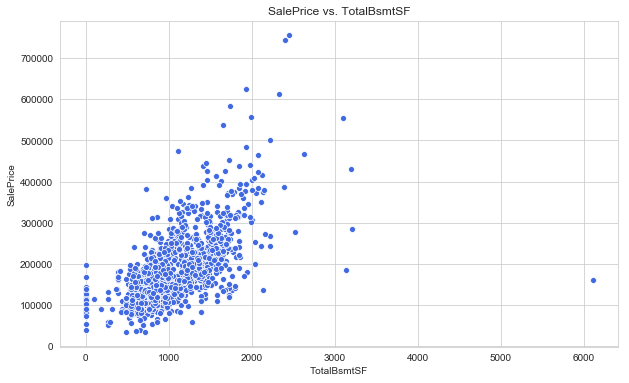

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalBsmtSF',y='SalePrice', data = train,color = 'royalblue')
plt.title('SalePrice vs. TotalBsmtSF')
plt.show()

#### **4. SalePrice vs. GarageArea**

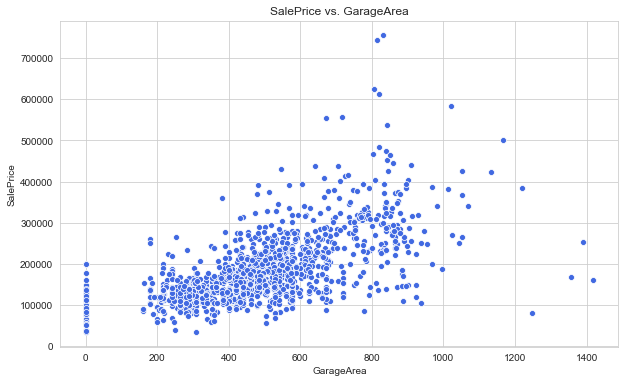

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GarageArea',y='SalePrice', data = train,color = 'royalblue')
plt.title('SalePrice vs. GarageArea')
plt.show()

### **Plotting SalePrice relationships with categorical features**

#### **1. SalePrice vs. OverallQual**

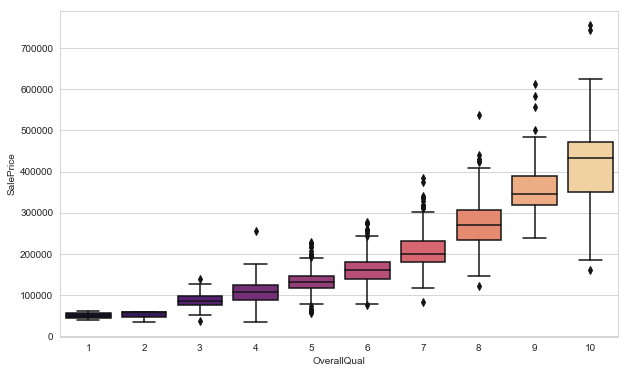

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallQual', y='SalePrice', data = train,palette='magma')
plt.show()

#### **SalePrice vs. Street**

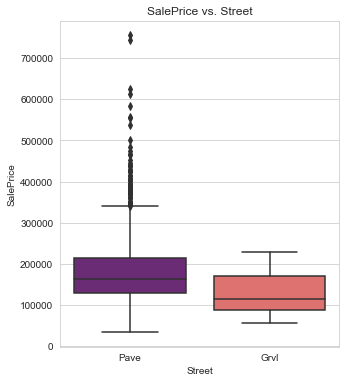

In [24]:
plt.figure(figsize=(5,6))
sns.boxplot(x='Street', y='SalePrice', data = train,palette='magma')
plt.title('SalePrice vs. Street')
plt.show()

#### **2. SalePrice vs. YearBuilt**

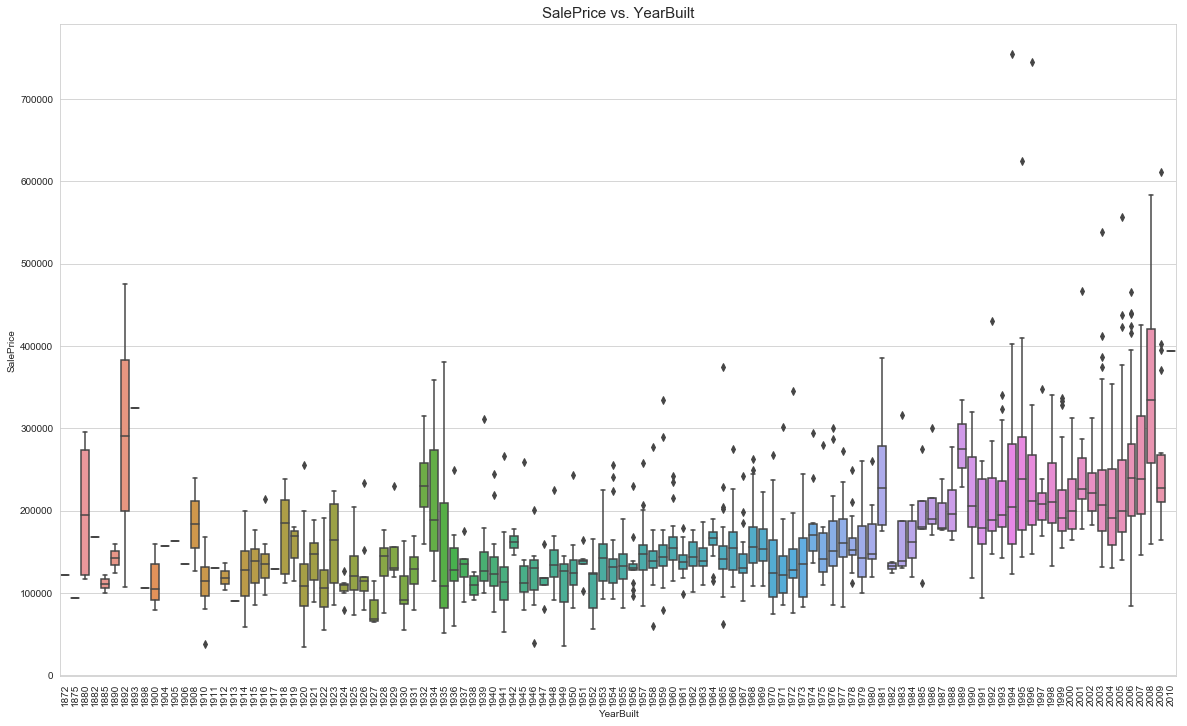

In [25]:
plt.figure(figsize=(20,12))
sns.boxplot(x='YearBuilt', y='SalePrice', data = train)
plt.xticks(rotation = 90)
plt.title('SalePrice vs. YearBuilt', fontsize=15)
plt.show()

### **Preparing the Data**

**Filling in the missing values**

In [26]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [27]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')

In [28]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df[col] = df[col].fillna(int(0))

In [29]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    df[col] = df[col].fillna('None')

In [30]:
#MasVnrArea : replace with zero
df['MasVnrArea'] = df['MasVnrArea'].fillna(int(0))

In [31]:
#MasVnrType : replace with None
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [32]:
#There is put mode value 
df['Electrical'] = df['Electrical'].fillna(df['Electrical']).mode()[0]

In [33]:
#There is no need of Utilities
df = df.drop(['Utilities'], axis=1)

In [34]:
df['PoolQC'] = df['PoolQC'].fillna('None')

In [35]:
df['MiscFeature'].fillna('None', inplace = True)

In [36]:
df['Alley'].fillna('None', inplace = True)

In [37]:
df['Fence'].fillna('None', inplace = True)

In [38]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [39]:
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace = True)


In [40]:
df['BsmtFullBath'].fillna(0, inplace = True)

In [41]:
df['FullBath'].fillna(df['FullBath'].mode()[0],inplace = True)

In [42]:
for col in ['SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [43]:
df['MSZoning'].fillna(df['MSZoning'].mode()[0],inplace=True)

In [44]:
df['Functional'].fillna(df['Functional'].mode()[0],inplace=True)

In [45]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col].fillna(0,inplace=True)

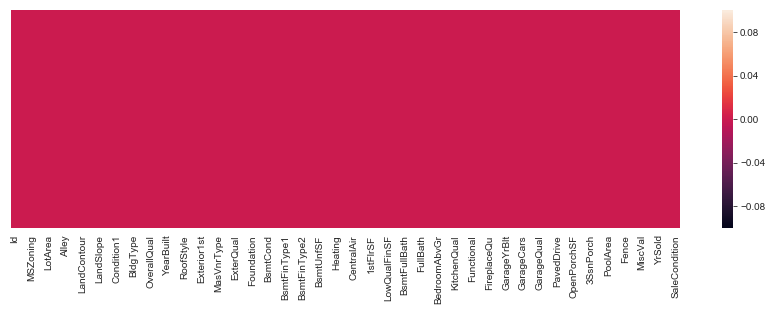

In [46]:
#Checking there is any null value or not
plt.figure(figsize=(15, 4))
sns.heatmap(df.isnull(),yticklabels=False)
plt.show()

There are no remaining Null Values in the dataset

### **Label Encoding the categorical features**

In [47]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [48]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c] = lbl.transform(list(df[c].values))

### Splitting the data into Training and Test sets

In [49]:
train_data = df.iloc[:1460,:]
test_data = df.iloc[1460:,:]

In [50]:
train_data.shape

(1460, 79)

In [51]:
test_data.shape

(1459, 79)

In [52]:
X = train_data
y = train['SalePrice']

### **Splitting the datasets into training and testing sets**

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.21, random_state = 7)

## **Regression Models**

### **1. Linear Regression**

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
lin_reg.score(X_test,y_test)

0.8631017989959464

In [56]:
prediction = lin_reg.predict(test_data)

### **2. Random Forest Regressor**

In [57]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [58]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
model.score(X_test,y_test)

0.9035441500446966

### **3. Gradient Boosting Regressor**

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [61]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [62]:
GBR.score(X_test,y_test)

0.9180869611432237

**Since Gradient Boosting Regressor has the highest score using it to make final generation**

In [63]:
GBR.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [64]:
predictions = GBR.predict(test_data)

In [65]:
submission = pd.DataFrame({'Id':test_data['Id'],'SalePrice':predictions})

In [66]:
submission.to_csv('housepricesub.csv',index=False)